In [125]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

dat = pd.read_csv('auto.csv')
# convert horsepower from string to float and mean fill the 5 missing values.
hp = pd.to_numeric(dat['horsepower'], downcast='float', errors='coerce')
hp = hp.fillna(value=hp.mean())
dat['horsepower'] = hp

In [93]:
# Question 8

X = sm.add_constant(dat['horsepower'])
est = sm.OLS(dat['mpg'], X).fit()
print(est.summary())

# (a)

# i. Is there a relationship between the predictor and the response?

# Yes - a statistically significant releationship exists.
# - The coefficeint for the horsepower paramater is non-zero: -0.1578
# - The coefficeint for the horsepower paramater has a low standard error: 0.007
# - ... the ratio between these quantites (t-statistic) has a large absolute value: -24.096
# - The p-value for the t-statistic is < 10^-3
# - Therefore we can reject the null hypothesis.

# ii. How strong is the relationship between the predictor and the response?
# ~60% of the variance in mpg is explained by horsepower.

print('r-squared: {} '.format(est.rsquared))


# iii. Is the relationship between the predictor and the response positive or negative?
# negative.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     580.6
Date:                Mon, 03 Sep 2018   Prob (F-statistic):           1.45e-79
Time:                        15:12:50   Log-Likelihood:                -1200.1
No. Observations:                 397   AIC:                             2404.
Df Residuals:                     395   BIC:                             2412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0058      0.729     54.903      0.0

In [94]:
# iv. What is the predicted mpg associated with a horsepower of 98?
# What are the associated 95% confidence and prediction intervals?

est.get_prediction(np.array([1, 98])).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.537028,0.253797,24.038067,25.035989,14.722193,34.351862


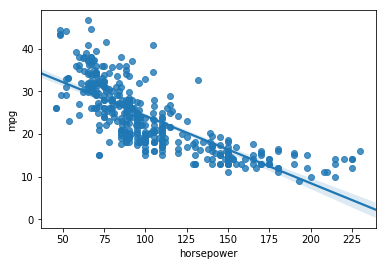

In [95]:
# (b) Plot the response and the predictor.

sns.regplot(x='horsepower', y='mpg', data=dat)
X = sm.add_constant(dat['horsepower'])
est = sm.OLS(dat['mpg'], X).fit()

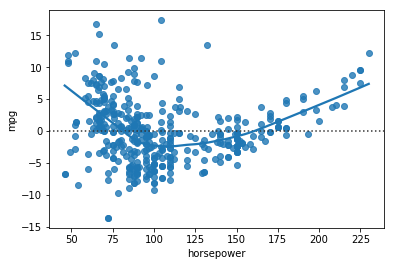

In [96]:
# (c) produce diagnostic plots of the least squares regression fit.
# Comment on any problems you see with the fit.

sns.residplot(dat['horsepower'], dat['mpg'], lowess=True)

# A:  There is a strong pattern, indicating non-linearity in the data.

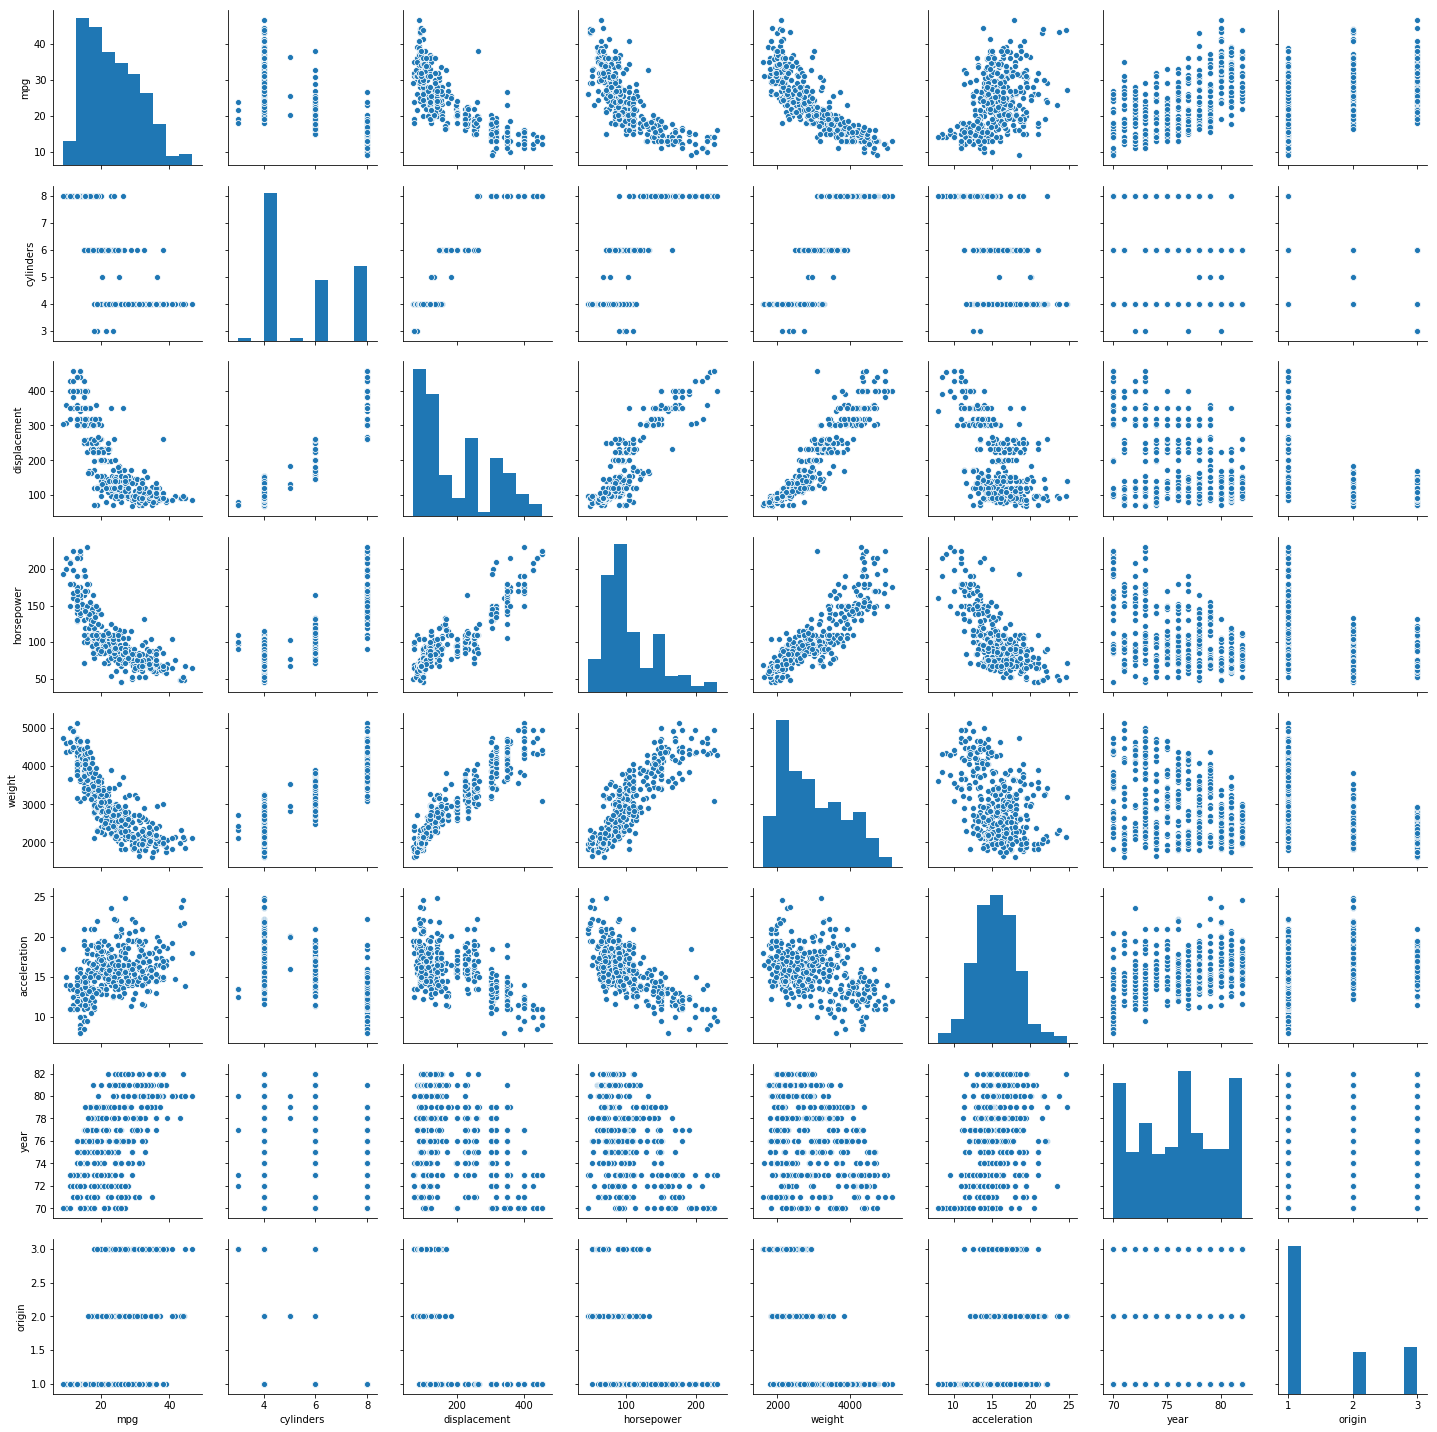

In [99]:
# Question 9

# (a) Produce a scatterplot matrix which includes all of the variables in the data set.

sns.pairplot(dat)


In [101]:
# (b) Compute the matrix of correlations between the variables using the function cor().
# You will need to exclude the name variable, which is qualitative

dat.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.771441,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.839715,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.893833,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.771441,0.839715,0.893833,1.000000,0.860581,-0.687039,-0.413022,-0.453962
weight,-0.831739,0.897017,0.933104,0.860581,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.687039,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.413022,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.453962,-0.581265,0.210084,0.184314,1.000000


In [114]:
# Use the lm() function to perform a multiple linear regression with mpg as the response
# and all other variables except name as the predictors.

X = sm.add_constant(dat).drop(['name', 'mpg'], axis=1)
est = sm.OLS(dat['mpg'], X).fit()
print(est.summary())

# i. Is there a relationship between the predictors and the response?

# Yes - a statistically siginificant relationship exists.
# The F-statistic is very large: 256.0
# We can reject the null hypothesis.

# ii. Which predictors appear to have a statistically significant relationship to the response?

# displacement, year, origin and weight (p-values < 0.05)


# iii. What does the coefficient for the year variable suggest?

# The coefficient is large relative to the others - it is an important predictor.
# There is a positive relationship between year and mpg - one additional year 
# corresponds to a 0.7625 increase in mpg.


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Mon, 03 Sep 2018   Prob (F-statistic):          2.41e-141
Time:                        15:44:18   Log-Likelihood:                -1037.4
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.7116      4.609     -4.060   

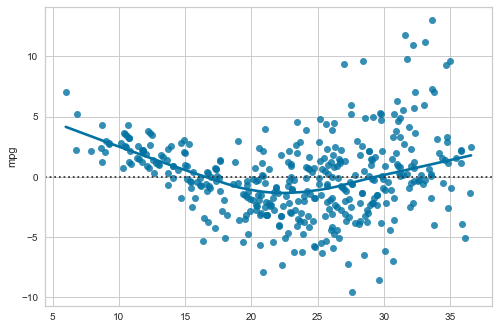

In [193]:
# (d) Produce diagnostic plots of the linear regression fit.

# Residual plot with sklearn and seaborn
X = dat.drop(['mpg', 'name'], axis=1)
y = dat['mpg']
regr = LinearRegression()
regr.fit(X, y)
y_hat = regr.predict(X)
resid = y - y_hat
sns.residplot(y_hat, resid,lowess=True)

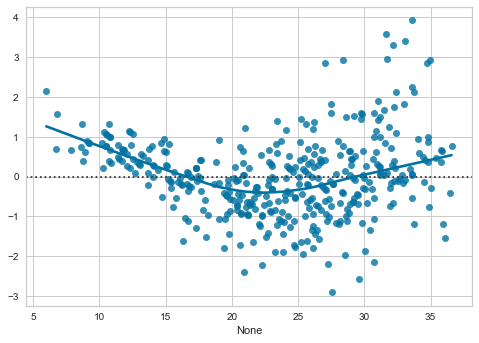

In [198]:
# Studentised residuals plot with statsmodels and seaborn

X = sm.add_constant(dat).drop(['name', 'mpg'], axis=1)
est = sm.OLS(dat['mpg'], X).fit()
sns.residplot(est.fittedvalues, est.get_influence().resid_studentized_internal,lowess=True)

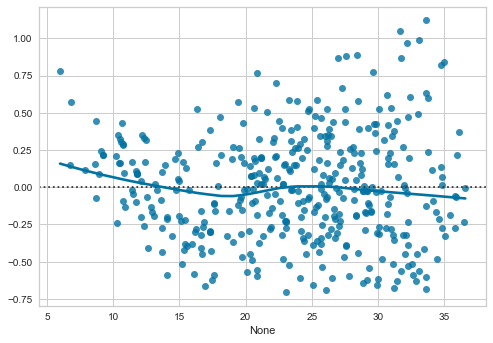

In [201]:
# Scale-Location or Spread-Location plot with statsmodels and seaborn

model_fitted_y = est.fittedvalues
model_residuals = est.resid
model_norm_residuals = est.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
sns.residplot(est.fittedvalues, model_norm_residuals_abs_sqrt,lowess=True)

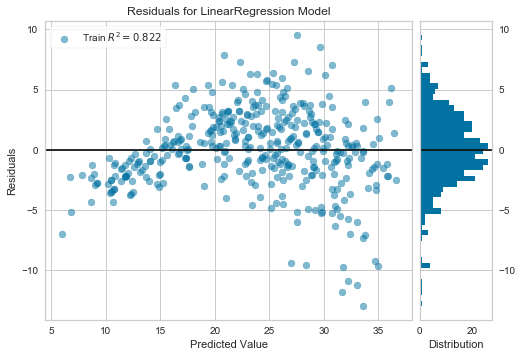

In [196]:
# Residual plot with yellowbick
# .. they're plotting y_hat - y?

regr = LinearRegression()
vis = ResidualsPlot(regr)
vis.fit(X, y)
vis.poof()

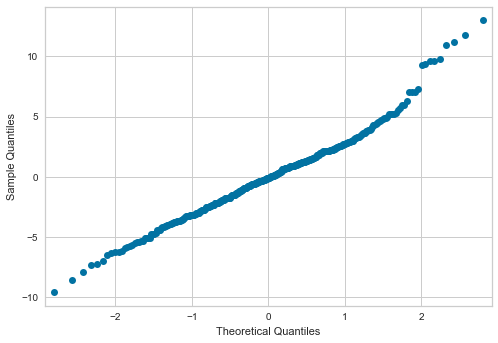

In [197]:
# QQ plot with statsmodels

qq = sm.qqplot(resid)

In [ ]:
# (i) Comment on any problems you see with the fit.

# There is a strong pattern in the residuals - which indicates non-linearity in the data.

# (ii) Do the residual plots suggest any unusually large outliers?


# (iii) Does the leverage plot identify any observations with unusually high leverage?